In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression, LinearRegression

In [17]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

## Multinomial

training score : 0.995 (multinomial)


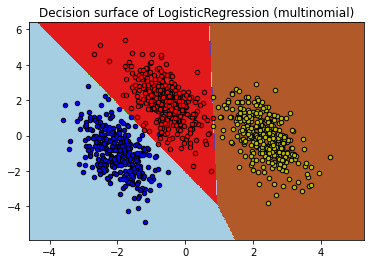

In [18]:
clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class='multinomial').fit(X, y)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), 'multinomial'))

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
ctrSet = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % 'multinomial')
plt.axis('tight')

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

'''
def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
'''

plt.show()

In [19]:
# line 1
boundary = ctrSet.collections[2:3][0].get_paths()[0].vertices
line1_point = boundary[np.where(boundary[:, 0] < 0)]

# line 2
boundary = ctrSet.collections[4:5][0].get_paths()[0].vertices
line2_point = boundary[np.where(boundary[:, 0] < 0.8)]

# line 3
boundary = ctrSet.collections[4:5][0].get_paths()[0].vertices
line3_point = boundary[np.where(boundary[:, 0] > 1)]

In [20]:
lines = [line1_point, line2_point, line3_point]
linears = [LinearRegression() for _ in range(3)]
coefs = []
intercepts = []

for points, model in zip(lines, linears) :
    x_train, y_train = points[:, 0].reshape(-1, 1), points[:, 1].reshape(-1, 1)
    model.fit(x_train, y_train)
    coefs.append(model.coef_[0][0])
    intercepts.append(model.intercept_[0])
    
coefs, intercepts

([-1.936533505919885, -41.8101188390178, -3.80805092585979],
 [-2.0058659008859414, 36.322065128741045, -0.20736015201908398])

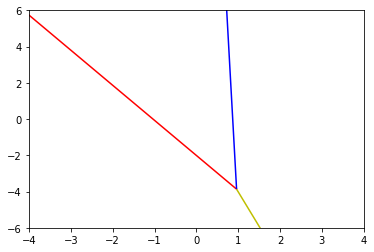

equation 1 : y = -1.936533505919885 * x + -2.0058659008859414
equation 2 : y = -41.8101188390178 * x + 36.322065128741045
equation 3 : y = -3.80805092585979 * x + -0.20736015201908398


In [21]:
def equation1(x) :
    return x * coefs[0] + intercepts[0]

def equation2(x) :
    return x * coefs[2] + intercepts[2]

def equation3(x) :
    return x * coefs[1] + intercepts[1]

x1 = np.arange(-4, 0.97,0.01)
y1 = equation1(x1)

x2 = np.arange(0.97, 4.01,0.01)
y2 = equation2(x2)

x3 = np.arange(-4, 0.97,0.01)
y3 = equation3(x3)

plt.plot(x1, y1, color='r')
plt.plot(x2, y2, color='y')
plt.plot(x3, y3, color='b')

plt.ylim(-6, 6)
plt.xlim(-4, 4)
plt.show()

for i in range(3) :
    print('equation {} : y = {} * x + {}'.format(i+1, coefs[i], intercepts[i]))

## Ovr

training score : 0.976 (ovr)


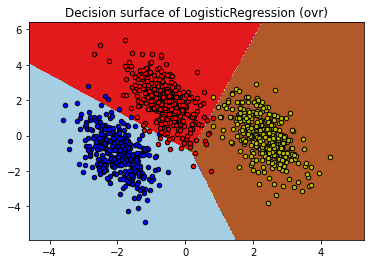

In [10]:
clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class='ovr').fit(X, y)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), 'ovr'))

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
ctrSet = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % 'ovr')
plt.axis('tight')

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_
'''
def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
'''
plt.show()

In [11]:
# line 1
boundary = ctrSet.collections[1:2][0].get_paths()[0].vertices
line1_point = boundary[np.where(boundary[:, 0] < -0.5)]

# line 2
boundary = ctrSet.collections[4:5][0].get_paths()[0].vertices
line2_point = boundary[np.where(boundary[:, 1] < -2)]

# line 3
boundary = ctrSet.collections[4:5][0].get_paths()[0].vertices
line3_point = boundary[np.where(boundary[:, 1] > 0)]

In [12]:
lines = [line1_point, line2_point, line3_point]
linears = [LinearRegression() for _ in range(3)]
coefs = []
intercepts = []

for points, model in zip(lines, linears) :
    x_train, y_train = points[:, 0].reshape(-1, 1), points[:, 1].reshape(-1, 1)
    model.fit(x_train, y_train)
    coefs.append(model.coef_[0][0])
    intercepts.append(model.intercept_[0])
    
coefs, intercepts

([-1.0457536400551366, -3.7787457297542937, 3.4761462610706353],
 [-0.69885688758402, -0.17965773624857917, -1.5249519773226585])

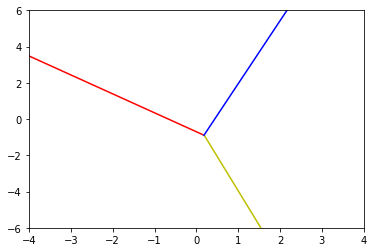

equation 1 : y = -1.0457536400551366 * x + -0.69885688758402
equation 2 : y = -3.7787457297542937 * x + -0.17965773624857917
equation 3 : y = 3.4761462610706353 * x + -1.5249519773226585


In [15]:
def equation1(x) :
    return x * coefs[0] + intercepts[0]

def equation2(x) :
    return x * coefs[1] + intercepts[1]

def equation3(x) :
    return x * coefs[2] + intercepts[2]

x1 = np.arange(-4, 0.18,0.01)
y1 = equation1(x1)

x2 = np.arange(0.18, 4.01,0.01)
y2 = equation2(x2)

x3 = np.arange(0.18, 4.01,0.01)
y3 = equation3(x3)

plt.plot(x1, y1, color='r')
plt.plot(x2, y2, color='y')
plt.plot(x3, y3, color='b')

plt.ylim(-6, 6)
plt.xlim(-4, 4)
plt.show()

for i in range(3) :
    print('equation {} : y = {} * x + {}'.format(i+1, coefs[i], intercepts[i]))